<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [6]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [15]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [8]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [9]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [10]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [17]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


In [12]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()

# Print the type to confirm it's a NumPy array
print(type(Y))
print(Y)


<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in X then reassign it to the variable X using the transform provided below.

In [21]:
# Function to identify columns
def identify_columns(df):
    identifier_cols = []
    numeric_cols = []
    categorical_cols = []
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Check for identifier-like numeric columns
            if col.lower().endswith('id') or col.lower().endswith('number'):
                identifier_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    
    return identifier_cols, numeric_cols, categorical_cols

# Identify columns in X
identifier_cols, numeric_cols, categorical_cols = identify_columns(X)

print(f'Identifier columns: {identifier_cols}')
print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')

# Initialize the StandardScaler
transform = StandardScaler()

# Fit and transform the numeric data
X[numeric_cols] = transform.fit_transform(X[numeric_cols])

# Combine the standardized numeric data with the non-numeric and identifier columns
X = pd.concat([X[numeric_cols], X[identifier_cols + categorical_cols]], axis=1)

# Print the first few rows to confirm the transformation
print(X.head())

Identifier columns: ['FlightNumber']
Numeric columns: ['PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034'

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [22]:
# Assuming 'data' is your DataFrame and 'Class' is the target column
# Separate features and target variable
X = data.drop(columns=['Class'])
Y = data['Class']

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Standardize only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')


X_train shape: (72, 17)
X_test shape: (18, 17)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [23]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your DataFrame and 'Class' is the target column
# Separate features and target variable
X = data.drop(columns=['Class'])
Y = data['Class']

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Standardize only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Optionally drop non-numeric columns if they are not needed
X = X[numeric_cols]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the logistic regression model
lr = LogisticRegression()

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Create the GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Print the best parameters found
print(f'Best parameters found: {logreg_cv.best_params_}')
print(f'Best score: {logreg_cv.best_score_}')


Best parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.7446428571428572


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [25]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7446428571428572


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
# Calculate the accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy}')

Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


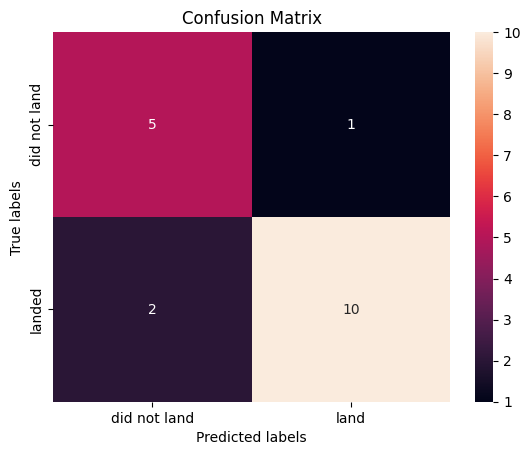

In [26]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

                 Predicted Positive   Predicted Negative
Actual Positive        TP                   FN
Actual Negative        FP                   TN


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming 'data' is your DataFrame and 'Class' is the target column
# Separate features and target variable
X = data.drop(columns=['Class'])
Y = data['Class']

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Standardize only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Optionally drop non-numeric columns if they are not needed
X = X[numeric_cols]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create an SVM object
svm = SVC()

# Define the parameter grid
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create the GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters found
print(f'Best parameters found: {svm_cv.best_params_}')
print(f'Best score: {svm_cv.best_score_}')

# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy}')


Best parameters found: {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best score: 0.8321428571428571
Accuracy on test data: 0.7777777777777778


In [29]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8321428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [33]:
# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy}')

Accuracy on test data: 0.7777777777777778


We can plot the confusion matrix


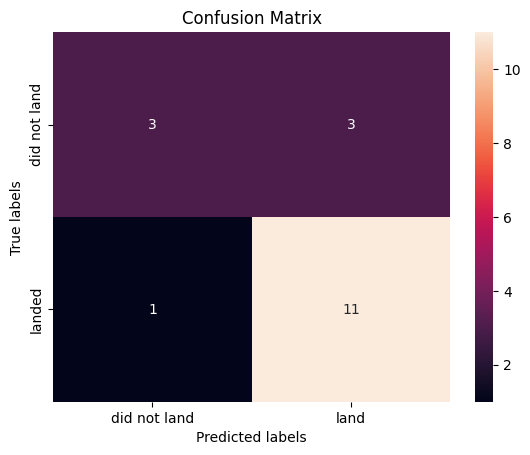

In [34]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [36]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [46]:
import pandas as pd
import requests
import io
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# URL of the dataset
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetch the data from the URL
response = requests.get(URL2)
response.raise_for_status()  # Check if the request was successful

# Read the CSV data into a DataFrame
X = pd.read_csv(io.StringIO(response.text))

# Function to identify columns
def identify_columns(df):
    identifier_cols = []
    numeric_cols = []
    categorical_cols = []
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Check for identifier-like numeric columns
            if col.lower().endswith('id') or col.lower().endswith('number'):
                identifier_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    
    return identifier_cols, numeric_cols, categorical_cols

# Identify columns in X
identifier_cols, numeric_cols, categorical_cols = identify_columns(X)

print(f'Identifier columns: {identifier_cols}')
print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Combine the standardized numeric data with the non-numeric and identifier columns
X = pd.concat([X[numeric_cols], X[identifier_cols + categorical_cols]], axis=1)

# Print the column names to identify the target column
print(X.columns)

# Assume the target column is the last column
target_column = X.columns[-1]

# Separate the target variable and features
y = X[target_column]
X = X.drop(columns=[target_column])

# Ensure the target variable contains discrete class labels
# For demonstration purposes, let's convert the target to discrete classes using binning
y = pd.cut(y, bins=3, labels=["low", "medium", "high"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define the decision tree classifier model
tree = DecisionTreeClassifier()

# Define the parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters found: {tree_cv.best_params_}')
print(f'Best score: {tree_cv.best_score_}')

# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy}')


/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Identifier columns: ['FlightNumber']
Numeric columns: ['PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034'

In [48]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7928571428571428


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [55]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.score(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy}')


Accuracy on test data: 0.6111111111111112


We can plot the confusion matrix


In [56]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<class 'ValueError'>: Mix of label input types (string and number)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [53]:
# Define the k-nearest neighbors classifier model
KNN = KNeighborsClassifier()

# Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, y_train)

# Print the best parameters found
print(f'Best parameters found: {knn_cv.best_params_}')
print(f'Best score: {knn_cv.best_score_}')

# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy}')


Best parameters found: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
Best score: 0.7535714285714286
Accuracy on test data: 0.7222222222222222


In [54]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.7535714285714286


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [57]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.score(X_test, y_test)
print(f'Accuracy on test data: {test_accuracy}')


Accuracy on test data: 0.7222222222222222


We can plot the confusion matrix


In [58]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<class 'ValueError'>: Mix of label input types (string and number)

## TASK  12


Find the method performs best:


In [59]:
import pandas as pd
import requests
import io
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# URL of the dataset
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetch the data from the URL
response = requests.get(URL2)
response.raise_for_status()  # Check if the request was successful

# Read the CSV data into a DataFrame
X = pd.read_csv(io.StringIO(response.text))

# Function to identify columns
def identify_columns(df):
    identifier_cols = []
    numeric_cols = []
    categorical_cols = []
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Check for identifier-like numeric columns
            if col.lower().endswith('id') or col.lower().endswith('number'):
                identifier_cols.append(col)
            else:
                numeric_cols.append(col)
        else:
            categorical_cols.append(col)
    
    return identifier_cols, numeric_cols, categorical_cols

# Identify columns in X
identifier_cols, numeric_cols, categorical_cols = identify_columns(X)

print(f'Identifier columns: {identifier_cols}')
print(f'Numeric columns: {numeric_cols}')
print(f'Categorical columns: {categorical_cols}')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Combine the standardized numeric data with the non-numeric and identifier columns
X = pd.concat([X[numeric_cols], X[identifier_cols + categorical_cols]], axis=1)

# Print the column names to identify the target column
print(X.columns)

# Assume the target column is the last column
target_column = X.columns[-1]

# Separate the target variable and features
y = X[target_column]
X = X.drop(columns=[target_column])

# Ensure the target variable contains discrete class labels
# For demonstration purposes, let's convert the target to discrete classes using binning
y = pd.cut(y, bins=3, labels=["low", "medium", "high"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define the parameter grids
knn_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

logreg_params = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Initialize the models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logreg = LogisticRegression(max_iter=1000)

# Create GridSearchCV objects
knn_cv = GridSearchCV(knn, knn_params, cv=10)
tree_cv = GridSearchCV(tree, tree_params, cv=10)
logreg_cv = GridSearchCV(logreg, logreg_params, cv=10)

# Fit the models
knn_cv.fit(X_train, y_train)
tree_cv.fit(X_train, y_train)
logreg_cv.fit(X_train, y_train)

# Print the best parameters and scores
print(f'Best KNN parameters: {knn_cv.best_params_}')
print(f'Best KNN score: {knn_cv.best_score_}')
print(f'Best Decision Tree parameters: {tree_cv.best_params_}')
print(f'Best Decision Tree score: {tree_cv.best_score_}')
print(f'Best Logistic Regression parameters: {logreg_cv.best_params_}')
print(f'Best Logistic Regression score: {logreg_cv.best_score_}')

# Calculate the accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, y_test)
tree_test_accuracy = tree_cv.score(X_test, y_test)
logreg_test_accuracy = logreg_cv.score(X_test, y_test)

print(f'KNN test accuracy: {knn_test_accuracy}')
print(f'Decision Tree test accuracy: {tree_test_accuracy}')
print(f'Logistic Regression test accuracy: {logreg_test_accuracy}')

# Find the best method
best_method = max(('KNN', knn_test_accuracy), ('Decision Tree', tree_test_accuracy), ('Logistic Regression', logreg_test_accuracy), key=lambda x: x[1])
print(f'The best method is {best_method[0]} with an accuracy of {best_method[1]}')


/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Identifier columns: ['FlightNumber']
Numeric columns: ['PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034'

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
